In [1]:
# Import neccesary libraries
import pandas as pd
import seaborn as sns

In [2]:
# Import the combined dataset
df_combined = pd.read_csv("combined_data.csv")

In [3]:
# Import the plane dataset
plane_data = pd.read_csv("plane-data.csv")

In [4]:
plane_data

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [5]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [6]:
# We can see that the column "Tailnum" is present in both the datasets but they don't match. 
# Therefore the 't' and 'n' in tailnum is capitalised in the plane dataset.
plane_data.rename(columns = {'tailnum':'TailNum'}, inplace = True)

In [7]:
plane_data.head()

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove rows that don't contain departure or arrival times
df_drop = df_combined.dropna(subset=['DepTime', 'ArrTime'])

In [9]:
df_drop.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14279089
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [10]:
# Convert ArrDelay and DepDelay columns from float to int
df_drop = df_drop.astype({"ArrDelay":"int","DepDelay":"int"})

In [11]:
# Add Arrival Delay and Departure delay to get total delay and create a new column to store total delays
df_drop['TotalDelay'] = df_drop['ArrDelay'] + df_drop['DepDelay']

In [12]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14279090 entries, 0 to 14595136
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           int32  
 15  DepDelay           int32  
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [13]:
# Remove unnecessary columns
df_edit = df_drop.iloc[:, [10,14,15,29]]

In [14]:
df_edit

,TailNum,ArrDelay,DepDelay,TotalDelay
0,N657AW,6,-2,4
1,N834AW,-5,0,-5
2,N605AW,-23,0,-23
3,N312AW,-8,-2,-10
4,N309AW,0,-8,-8
...,...,...,...,...
14595132,N670DN,13,-7,6
14595133,N829MH,5,11,16
14595134,N623DL,15,-1,14
14595135,N970DL,36,38,74


In [15]:
# Merge the new dataset and plane data set with "Tailnum" as the common column
df_merged = pd.merge(df_edit, plane_data, on = 'TailNum', how = 'inner')

In [16]:
df_merged

,TailNum,ArrDelay,DepDelay,TotalDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N657AW,6,-2,4,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,N657AW,-5,1,-4,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
2,N657AW,-10,-4,-14,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
3,N657AW,-2,-5,-7,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
4,N657AW,-2,5,3,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
12621101,N665JB,40,-7,33,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
12621102,N665JB,10,3,13,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
12621103,N665JB,-3,-4,-7,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
12621104,N665JB,-1,5,4,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [17]:
df_merged.isna().sum()

TailNum               0
ArrDelay              0
DepDelay              0
TotalDelay            0
type             692721
manufacturer     692721
issue_date       692721
model            692721
status           692721
aircraft_type    692721
engine_type      692721
year             692721
dtype: int64

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12621106 entries, 0 to 12621105
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   TailNum        object
 1   ArrDelay       int32 
 2   DepDelay       int32 
 3   TotalDelay     int32 
 4   type           object
 5   manufacturer   object
 6   issue_date     object
 7   model          object
 8   status         object
 9   aircraft_type  object
 10  engine_type    object
 11  year           object
dtypes: int32(3), object(9)
memory usage: 1.1+ GB


In [19]:
# Remove rows that don't contain manufactured year
df_merged = df_merged.dropna(subset=['year'])

In [20]:
df_merged.isna().sum()

TailNum          0
ArrDelay         0
DepDelay         0
TotalDelay       0
type             0
manufacturer     0
issue_date       0
model            0
status           0
aircraft_type    0
engine_type      0
year             0
dtype: int64

In [21]:
# Remove unnecessary columns
df_final = df_merged.iloc[:, [0,3,11]]

In [22]:
df_final

,TailNum,TotalDelay,year
0,N657AW,4,1999
1,N657AW,-4,1999
2,N657AW,-14,1999
3,N657AW,-7,1999
4,N657AW,3,1999
...,...,...,...
12621101,N665JB,33,2007
12621102,N665JB,13,2007
12621103,N665JB,-7,2007
12621104,N665JB,4,2007


In [23]:
# Sort by year
df_final.sort_values(by='year', ascending=True)

,TailNum,TotalDelay,year
2791281,N235SW,53,0000
2789331,N235SW,4,0000
2789330,N235SW,-4,0000
2789329,N235SW,6,0000
2789328,N235SW,-12,0000
...,...,...,...
6257110,N852AS,17,None
6257111,N852AS,6,None
6257112,N852AS,148,None
6257104,N852AS,67,None


In [24]:
# We can see that there are rows with no particular year
# We check all the unique entries
year = df_final.year.unique()
year

array(['1999', 'None', '1997', '1990', '2000', '1989', '2001', '1998',
       '2005', '1987', '1988', '2002', '1986', '1984', '1995', '1996',
       '1985', '2003', '2004', '1992', '1994', '1991', '1993', '1966',
       '0000', '2006', '1957', '1969', '1976', '1975', '1968', '1977',
       '1967', '1971', '1979', '1978', '1980', '1970', '1973', '1972',
       '1956', '2007', '1974', '1963', '1983', '1982', '1959', '1964',
       '1962', '1965'], dtype=object)

In [25]:
# Sort the years in increasing order
print(sorted(year))

['0000', '1956', '1957', '1959', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', 'None']


In [26]:
# Remove rows that contain '0000' and 'None'
df_final = df_final[(df_final['year'] != "0000") & (df_final['year'] != "None")]

In [27]:
year = df_final.year.unique()
print(sorted(year))

['1956', '1957', '1959', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


In [28]:
df_final = df_final.sort_values(by = 'year', ascending=True)
df_final

,TailNum,TotalDelay,year
8899882,N381AA,-21,1956
8899887,N381AA,-15,1956
8899886,N381AA,44,1956
8899885,N381AA,-12,1956
8899884,N381AA,-9,1956
...,...,...,...
12536569,N317AT,23,2007
12536568,N317AT,20,2007
12536567,N317AT,-6,2007
12536577,N317AT,15,2007


In [29]:
# Group delays by year and find the mean delays
df_grouped = df_final.groupby("year").mean().reset_index()

In [30]:
df_grouped

,year,TotalDelay
0,1956,20.775180
1,1957,11.546570
2,1959,24.587026
3,1962,21.596167
4,1963,26.710054
5,1964,24.575725
6,1965,25.653725
7,1966,26.153510
8,1967,18.022282
9,1968,18.556770


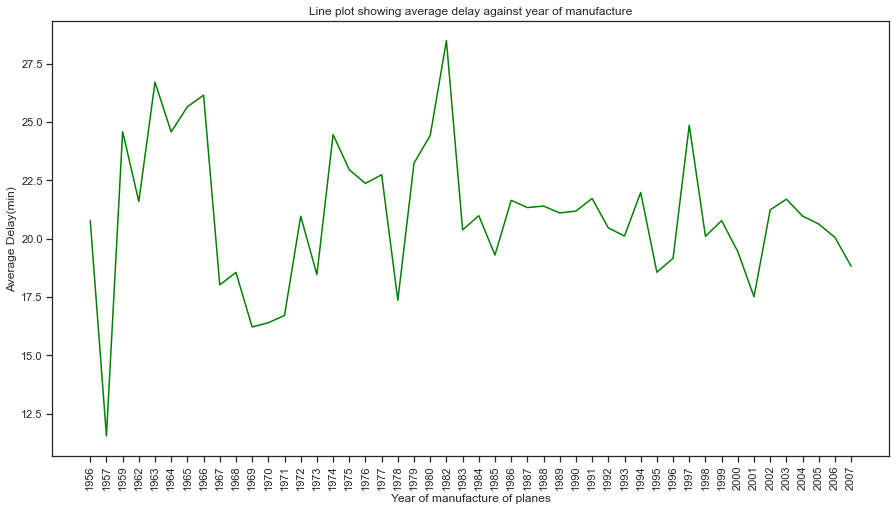

In [31]:
# Create a line plot with year on x axis and average total delay on y axis

sns.set(rc={"figure.figsize":(15, 8)})
sns.set_style ("ticks")
plot = sns.lineplot(data = df_grouped, x = "year", y = "TotalDelay", color = "green")
plot.set_xlabel("Year of manufacture of planes")
plot.set_ylabel("Average Delay(min)")
plot.set_title('Line plot showing average delay against year of manufacture')
plot.tick_params(axis='x', rotation=90)

In [32]:
# Convert year column to int
df_final['year'] = df_final.year.astype(int)
df_final.dtypes

TailNum       object
TotalDelay     int32
year           int32
dtype: object

In [33]:
# Find the correlation between year and total delay 
df_final['year'].corr(df_final['TotalDelay'])

-0.0021553115592562056

There seems to be no particular trend in the line graph

The correlation coefficient between year of manufacture and total delay is -0.002 which is very close to zero

Hence, there is no relationship between year of manufacture and total delay

Older planes do no suffer more delays